# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Data

In [2]:
#read the csv data
heart = pd.read_csv('heart.csv')

In [3]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
#looking for any null values
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Data Visualization

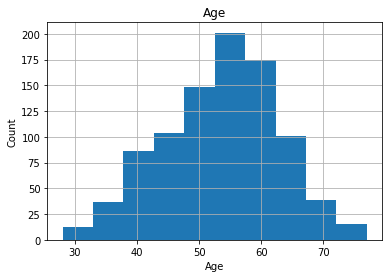

In [8]:
#What is the age range of the patients in the data?
heart.hist('Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


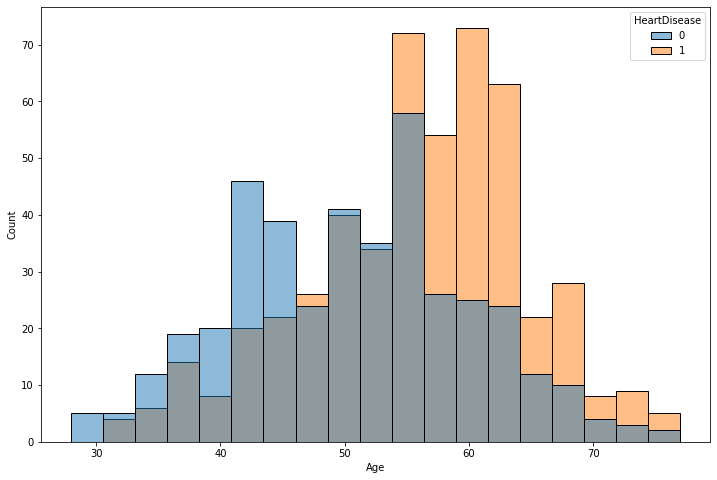

In [9]:
# Can see in this plot that heart disease is more likely when someone is 50+ years old.
plt.figure(figsize=(12, 8))
sns.histplot(data=heart, x="Age", hue="HeartDisease")

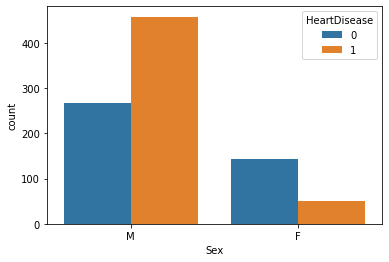

In [10]:
# Which sex is more likely to suffer from heart disease?
sns.countplot(data=heart, x='Sex',hue='HeartDisease')

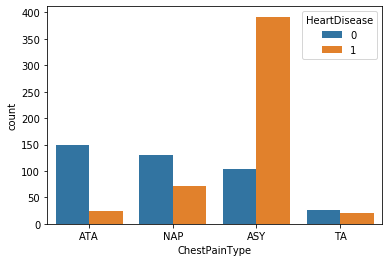

In [11]:
# Which chest pain type is more likely to suffer from heart disease?
sns.countplot(data=heart, x='ChestPainType',hue='HeartDisease')

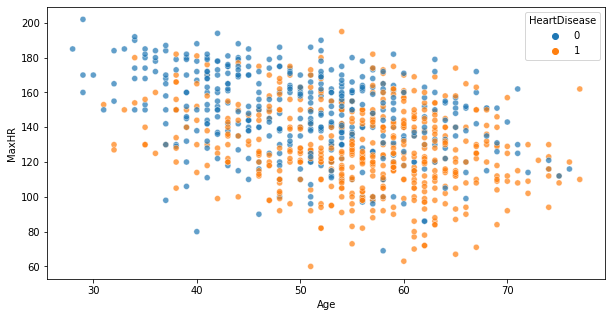

In [12]:
#Showing the relationship between max heart rate and age and rate of heart disease. 
plt.figure(figsize=(10,5))
sns.scatterplot(x='Age',y='MaxHR',hue='HeartDisease',data=heart,alpha=0.7)

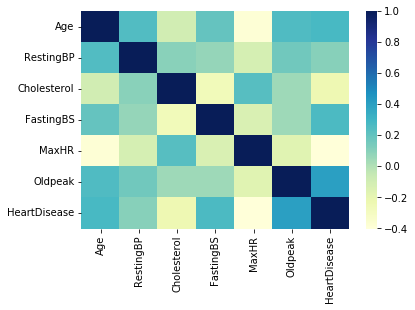

In [13]:
#purpose to show if we can see any correlation between any of the variables.
sns.heatmap(heart.corr(), cmap="YlGnBu")

## Data Preprocessing 

In [14]:
# use LabelEncoder from sklearn to transform non numerical values such as "M" or "F" into integers to be used in ML algorithm.
from sklearn import preprocessing

def label_encoder(data):
    le = preprocessing.LabelEncoder()
    heart[data]= le.fit_transform(heart[data])
    
   
label_encoder("Sex")
label_encoder("ChestPainType")
label_encoder("RestingECG")
label_encoder("ExerciseAngina")
label_encoder("ST_Slope")

heart


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


## Machine Learning Algorithm Training/Implementation

In [15]:
#Test/Train split to prepare the data for KNN algorithm testing. 
X = heart.drop(['HeartDisease'],axis=1)
y = heart['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
scaler = StandardScaler()

In [17]:
#Scale data so algorithm is not biased towards large values. 
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)
x_test_scaled = preprocessing.normalize(scaler_X_test)
x_scaled = preprocessing.normalize(scaler_X_train)

In [18]:
#Implement KNN with the default n_neighbors values of 5. 
knn = KNeighborsClassifier(n_neighbors =5)

knn.fit(x_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
from sklearn.metrics import classification_report,accuracy_score
# using metrics to test algorithm accuracy. 
X_prediction = knn.predict(x_test_scaled)
print("Classification Report: ")
print( classification_report(y_test,X_prediction))
print("Accuracy Score: " , accuracy_score(y_test,X_prediction))
X_prediction

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       112
           1       0.93      0.88      0.90       164

    accuracy                           0.89       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.89      0.89       276

Accuracy Score:  0.8876811594202898


array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [20]:
#cell used to test out how to deal with user input
user_input = np.array([8000,2,3,200,200,0,1,400,0,1.0,1])
user_input= np.reshape(user_input,(1,-1))
prediction = knn.predict(user_input)

prediction

array([1], dtype=int64)

## GUI Creation

In [21]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import seaborn as sns
from pandas import DataFrame



#using tkinter to create the gui
root = Tk()
root.geometry('1000x1000')
root.title("Patient Heart Disease Prediction Form")

notebook = ttk.Notebook()

home_page = ttk.Frame(notebook)
data_page = ttk.Frame(notebook)
notebook.add(home_page, text="Fill Out Form")
notebook.add(data_page, text="Data Visualizations")
notebook.pack(fill="both", expand="yes")

form_title = Label(home_page, text="Patient Heart Disease Prediction Form", font=("bold", 18))
form_title.place(x=250, y=50)

age_label = Label(home_page, text="Patient Age:", font=("bold", 12))
age_label.place(x=300, y=100)
age_entry = Entry(home_page)
age_entry.place(x=400,y=100)


patient_sex_label = Label(home_page, text="Patient Sex(Enter 1 for Male or 0 for Female): ", font=("bold", 12))
patient_sex_label.place(x=70, y=150)
patient_sex_option = Entry(home_page)
patient_sex_option.place(x=400, y=150)

chest_pain_label = Label(home_page, text="Chest Pain Type(0=ASY, 1=ATA, 2=NAP, 3=TA): ", font=("bold", 12))
chest_pain_label.place(x=50, y=200)
chest_pain_option = Entry(home_page)
chest_pain_option.place(x=400, y=200)

resting_pressure_label = Label(home_page, text="Resting Blood Pressure(mm Hg):", font=("bold", 12))
resting_pressure_label.place(x=160, y=250)
resting_pressure_entry = Entry(home_page)
resting_pressure_entry.place(x=400,y=250)

cholesterol_label = Label(home_page, text="Cholesterol(mm/dl):", font=("bold", 12))
cholesterol_label.place(x=250, y=300)
cholesterol_entry = Entry(home_page)
cholesterol_entry.place(x=400,y=300)

fasting_bs_label = Label(home_page, text="Fasting Blood Sugar:", font=("bold", 12))
fasting_bs_label.place(x=245, y=350)
fasting_bs_explanation = Label(home_page, text="(If fasting BS is greater than 120 mg/dl select 1, otherwise select 0.)", font=("bold", 12))
fasting_bs_explanation.place(x=50, y=390)
fasting_bs_option = Entry(home_page)
fasting_bs_option.place(x=400, y=350)

resting_ecg_label = Label(home_page, text="Resting ECG(0=LVH, 1=Normal, 2=ST):", font=("bold", 12))
resting_ecg_label.place(x=100, y=430)
resting_ecg_option = Entry(home_page)
resting_ecg_option.place(x=400, y=430)

max_hr_label = Label(home_page, text="Maximum Heart Rate:", font=("bold", 12))
max_hr_label.place(x=225, y=480)
max_hr_entry = Entry(home_page)
max_hr_entry.place(x=400,y=480)

exercise_angina_label = Label(home_page, text="Exercise Angina(0=No, 1=Yes):", font=("bold", 12))
exercise_angina_label.place(x=150, y=530)
exercise_ang_option = Entry(home_page)
exercise_ang_option.place(x=400, y=530)

oldpeak_label = Label(home_page, text="Exercise Relative to Rest(oldpeak):", font=("bold", 12))
oldpeak_label.place(x=135, y=580)
old_peak_entry = Entry(home_page)
old_peak_entry.place(x=400,y=580)

st_label = Label(home_page, text="ST/HR slope(0=Down, 1=Flat, 2=Up):", font=("bold", 12))
st_label.place(x=120, y=630)
st_option = Entry(home_page)
st_option.place(x=400, y=630)




#function to use KNN within the gui
def knn_model(user_values):
    X = heart.drop(['HeartDisease'],axis=1)
    y = heart['HeartDisease']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    scaler_X_train = scaler.fit_transform(X_train)
    scaler_X_test = scaler.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(scaler_X_train,y_train)
    prediction = knn.predict(user_values)
    return prediction
    
    
        
    
    
#function for when submit button is clicked gives the user results. 
def submit_click():
    
    user_input = np.array([age_entry.get(),patient_sex_option.get(),chest_pain_option.get(),
                 resting_pressure_entry.get(),cholesterol_entry.get(),fasting_bs_option.get(),
                 resting_ecg_option.get(),max_hr_entry.get(),
                 exercise_ang_option.get(),old_peak_entry.get(),
                 st_option.get()])
    
    user_input = np.reshape(user_input,(1,-1))
    patient_pred = knn_model(user_input)
    
    if patient_pred == 1:
        messagebox.showinfo( "Results", "Patient has or is at risk for heart disease.")
    if patient_pred == 0:
        messagebox.showinfo( "Results", "Patient does not have heart disease. ")
    
    
    
    
    

submit_button = Button(home_page, text="Submit", command=submit_click, padx=30, activebackground='blue', activeforeground='white')
submit_button.place(x=370, y=690)



#placing the graphs on the GUI data visualizations page
data1 = DataFrame(heart,columns=['Sex','HeartDisease'])

figure1_expl = Label(data_page, text="In graph 0=Female, 1=Male", font=("bold", 12))
figure1_expl.place(x=150, y=20)
figure1 = plt.Figure(figsize=(5,4))
axis1 = figure1.add_subplot()
barplot1 = FigureCanvasTkAgg(figure1, data_page)
barplot1.get_tk_widget().place(x=100, y=50) 
data1 = data1[['Sex','HeartDisease']].groupby('Sex').sum()
data1.plot(kind='bar', legend=True, ax=axis1,color='purple')
axis1.set_ylabel("Count")
axis1.set_title('Sex More Likely to Suffer From Heart Disease')

data2 = DataFrame(heart,columns=['ChestPainType','HeartDisease'])

figure2_expl = Label(data_page, text="0=ASY, 1=ATA, 2=NAP, 3=TA", font=("bold", 12))
figure2_expl.place(x=650, y=380)
figure2 = plt.Figure(figsize=(5,5))
axis2 = figure2.add_subplot()
barplot2 = FigureCanvasTkAgg(figure2, data_page)
barplot2.get_tk_widget().place(x=600, y=5)
data2 = data2[['ChestPainType','HeartDisease']].groupby('ChestPainType').sum()
data2.plot(kind='bar', legend=True, ax=axis2, color='orange')
axis2.set_ylabel("Count")
axis2.set_title('Chest Pain Type With Highest Occurance of Heart Disease')


data3 = DataFrame(heart,columns=['MaxHR','Age'])

figure3 = plt.Figure(figsize=(6,5))
axis3 = figure3.add_subplot()
axis3.scatter(data3['MaxHR'],data3['Age'], alpha=0.5)
scatter = FigureCanvasTkAgg(figure3, data_page)
scatter.get_tk_widget().place(x=100, y=370)
axis3.set_xlabel("Max Heart Rate")
axis3.set_ylabel("Age")
axis3.set_title("Any Relationship Between Age and Maximum Heart Rate?")

toolbar1 = NavigationToolbar2Tk(scatter, data_page)
toolbar1.update()
toolbar1.place(x=700,y=500)


        
    
    
    

root.mainloop()




##### 